## Списки

Вам дан список. Создайте новый список, в котором порядок следования элементов будет обратным относительно исходного списка. 

In [76]:
# ваше решение
a = [int(i) for i in input().split()]

b = a
b.reverse()
b

[5, 4, 3, 2, 1]

Вам дан список. Создайте новый список, в котором будут присутствовать только чётные элементы исходного списка.

In [45]:
# ваше решение
import pandas as pd
import numpy as np
a = [1, 2, 3, 4, 5, 6]
b = []
for i in range(len(a)):
    if a[i] % 2 == 0:
        b.append(a[i])
b

[2, 4, 6]

## Генераторы

Вам дан список. Создайте новый список, который удвоит каждый элемент исходного списка.

In [81]:
# ваше решение
a = np.array([1, 2, 3, 4, 5])
b = [i*2 for i in a]
b

[2, 4, 6, 8, 10]

Вам дан список. Создайте новый список, который умножит увеличит на треть элемент исходного списка.

In [83]:
# ваше решение
a = [1, 2, 3, 4, 5]
b = [i*4/3 for i in a]
b

[1.3333333333333333,
 2.6666666666666665,
 4.0,
 5.333333333333333,
 6.666666666666667]

## Встроенные функции

Вам дана строка. Выведите ascii-код максимального элемента в строке. 

In [74]:
# ваше решение
aa = list('abcdifgh')
t = max(aa)
ord(t)

105

Вам дана строка. Преобразуйте её в кортежи, состоящие из пары – порядковый номер элемента строки, ascii-код элемента.

In [105]:
# ваше решение
c1 = "skjghwpu5"
c1 = [ord(i) for i in c1]
c2 = [(i, j) for i, j in enumerate(c1)]
c2


[(0, 115),
 (1, 107),
 (2, 106),
 (3, 103),
 (4, 104),
 (5, 119),
 (6, 112),
 (7, 117),
 (8, 53)]

## NumPy

Создайте многомерный массив, посчитайте суммы элементов по различным осям.

In [52]:
# ваше решение
A = [list(map(int, input().split())) for i in range(int(input()))]
np.array(A)
c = np.sum(A, axis = 0)
r = np.sum(A, axis = 1)
print(c)
print(r)


[3 6 9]
[6 6 6]


Дан массив A (numpy.array()), заполненный 1.
Дан массив I (numpy.array()) индексов.

Прибавьте к каждому значению массиву A по массиву индексов +1.

In [34]:
import numpy as np

n = 10
k = 12
A = np.ones(n)
I = np.random.randint(0,len(A),k)
for i in range(len(I)):
    A[I[i]]+=1
print(A)

# ваше решение

[3. 1. 1. 3. 1. 2. 3. 2. 4. 2.]


## Pandas

https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Постройте гистаграмму переменной `Target`.
- Постройте heatmap для матрицы корреляции переменных в датасете.
- Постройте pairplot для всех переменных
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных классов *(т.е. отдельно какие показатели у класса 0, какие у класса 1)*.
- Проанализируйте колонку `SpType`. Подсчитаете количество звёзд относящихся к различным классам.
`SpType` - спектральный класс звезды согласно классификации Моргана-Кинана.

[dtype('float64') dtype('O') dtype('int64')]
Пропущенных значений нет


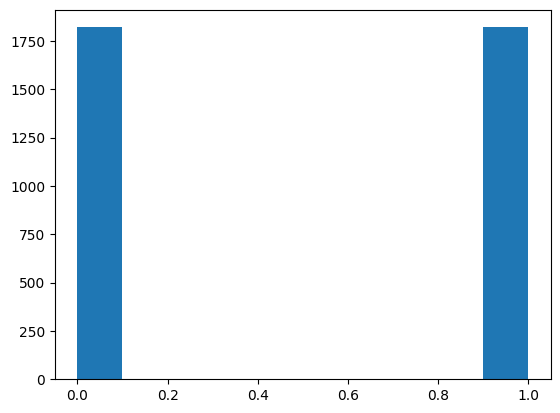

C:\Users\user\AppData\Local\Temp\ipykernel_16824\3103051070.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


<Axes: >

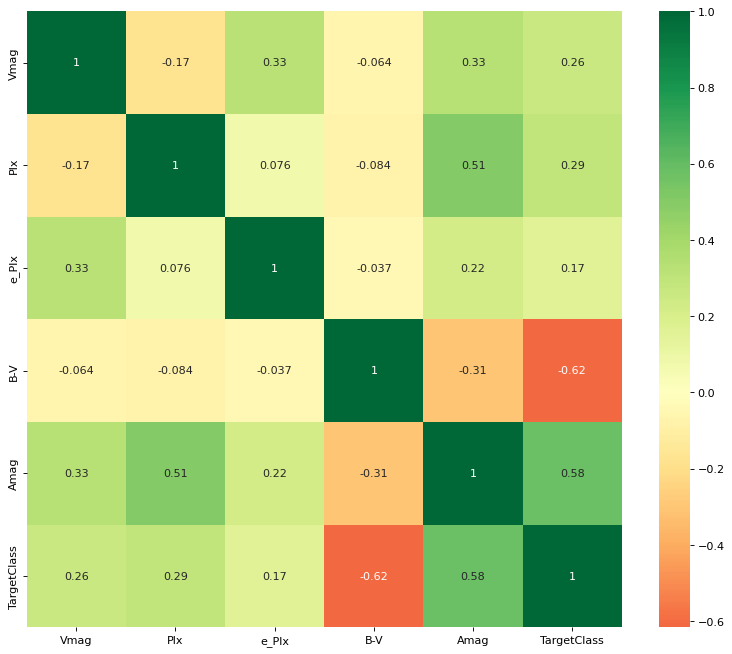

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Star3642_balanced.csv")
print(df.dtypes.unique())
df.isnull().sum()
print('Пропущенных значений нет')
plt.hist(df['TargetClass'])
plt.show()
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

Что я вообще строил?

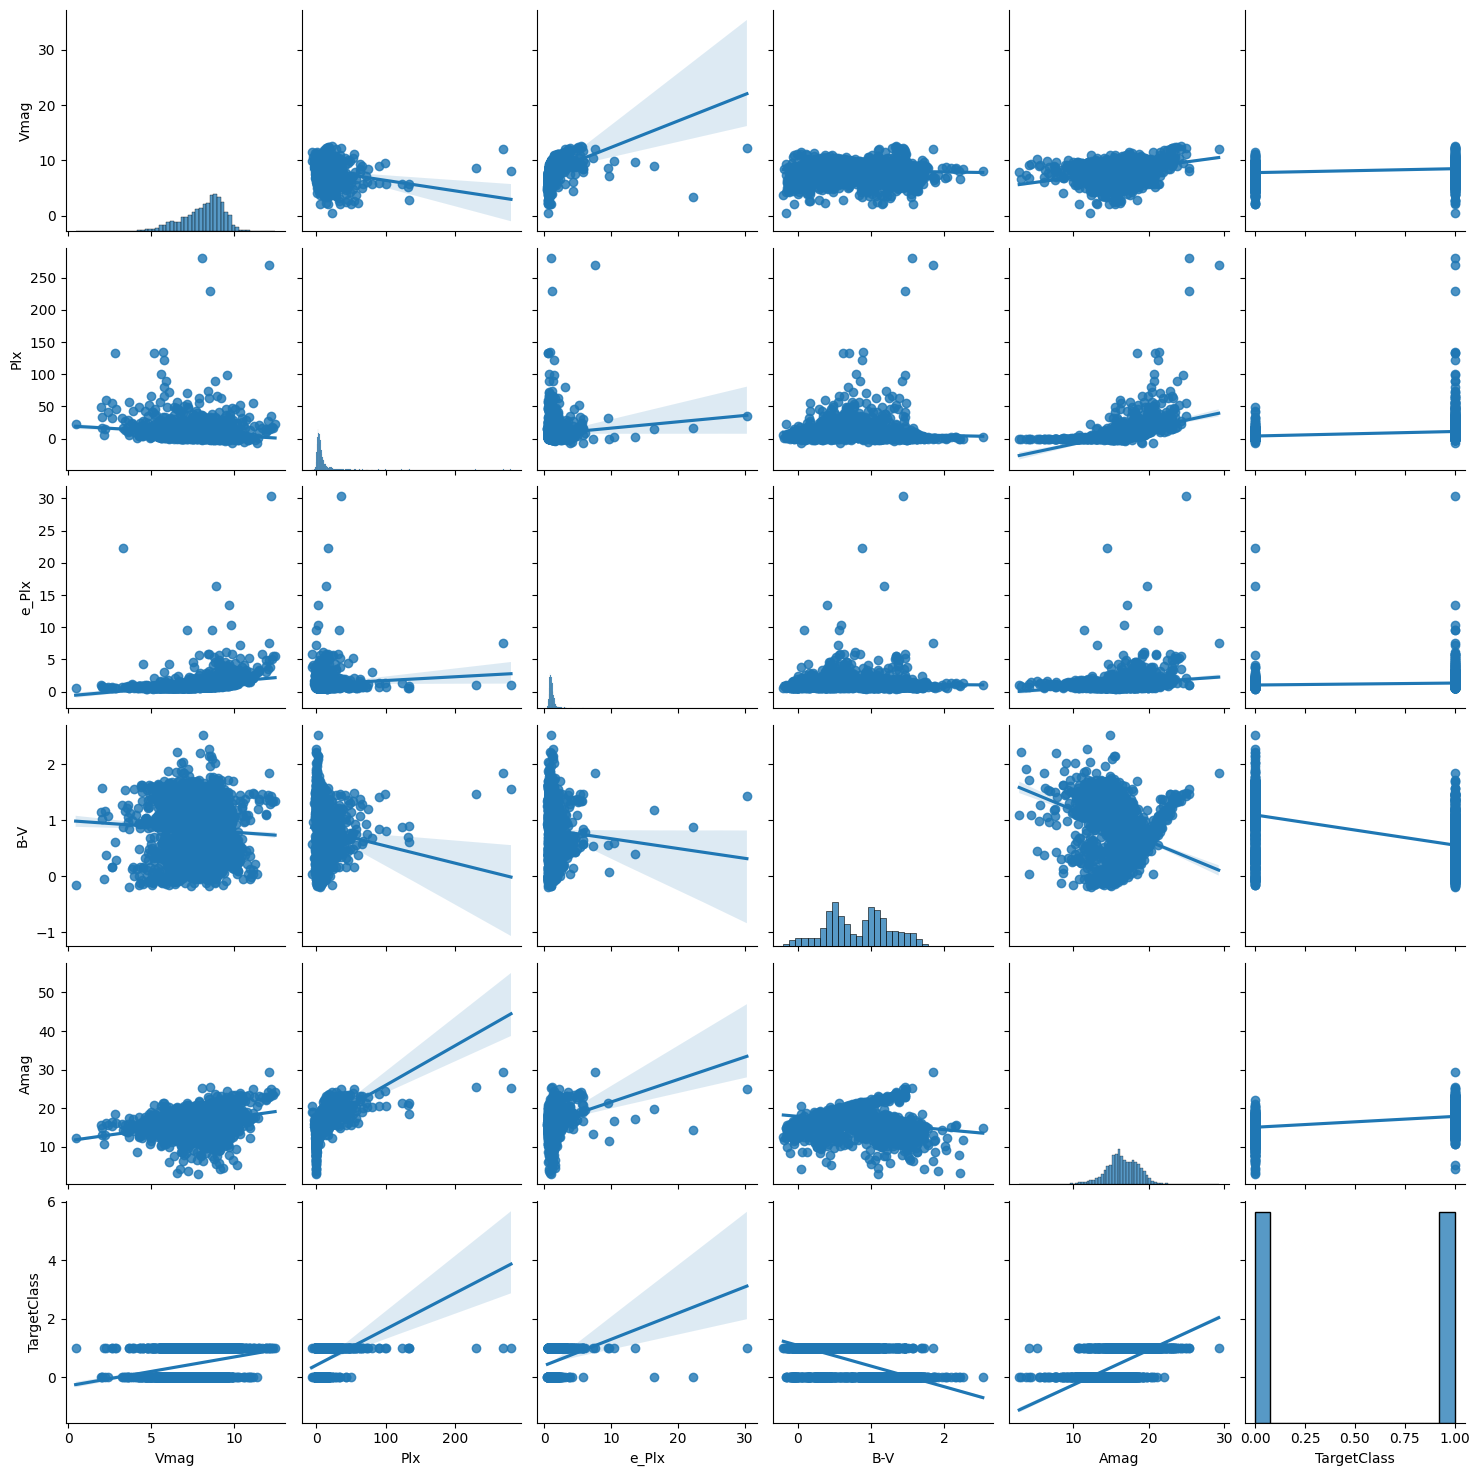

In [49]:
sns.pairplot(df, kind="reg")

<Axes: >

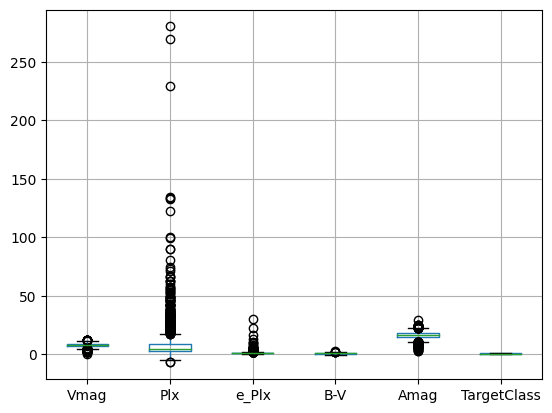

In [50]:
df.boxplot()

In [144]:
num = df.dtypes.loc[((df.dtypes == 'float') | (df.dtypes == 'int'))]
num = num.index
for i in range(num.shape[0]):
    v3 = df[num[i]].quantile(0.75)
    v2 = df[num[i]].quantile(0.25)
    vd = v3 - v2  
    df2 = df.loc[((df[num[i]] > v3 + 1.5 * vd) | (df[num[i]] < v2 - 1.5 * vd))]
    print(num[i])
    print(df2)
    
print(df.describe())


Vmag
       Vmag    Plx  e_Plx    B-V    SpType       Amag  TargetClass
21     4.83  35.33   0.82  0.421      F5IV  17.570717            1
128    4.34  23.73   0.68  0.170    A7Vvar  16.216488            1
172    3.99  10.84   0.79  1.554  K5/M0III  14.165147            0
208    0.45  22.68   0.57 -0.158      B3Vp  12.228215            1
210    2.40  42.14   0.78  1.083  K0III...  15.523474            0
...     ...    ...    ...    ...       ...        ...          ...
3326   3.59  18.76   0.74  1.275     K3III  14.956165            0
3443   4.17   0.79   0.52  0.130      B1Ia   8.658135            0
3483  12.31  18.80   4.99  1.336      M0V:  23.680790            1
3632   3.86  23.93   1.22  0.130       A5V  15.754713            1
3634  12.49  22.93   5.47  1.340      M0V:  24.292019            1

[81 rows x 7 columns]
Plx
       Vmag     Plx  e_Plx    B-V  SpType       Amag  TargetClass
21     4.83   35.33   0.82  0.421    F5IV  17.570717            1
23     5.96   22.42   0.67  0.41

- Проанализируйте колонку `SpType`. Подсчитаете количество звёзд относящихся к различным классам.
`SpType` - спектральный класс звезды согласно классификации Моргана-Кинана.

In [113]:
df['class'] = df['SpType'].map(lambda x: x[0])
df['class'].value_counts()

K    1306
F     876
G     830
A     241
B     193
M     189
O       5
C       2
Name: class, dtype: int64